In [3]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import random
import pandas as pd
import time

import matplotlib as mpl
import matplotlib.pyplot as plt

plt.rc('text',usetex=True)
plt.rcParams['font.family']='sans-serif'
plt.rcParams['font.sans-serif']=['Verdana']
plt.rcParams.update({'font.size': 15})
def adjust_spines(ax, spines):
    for loc, spine in ax.spines.items():
        if loc in spines:
            spine.set_position(('outward', 5))
        else:
            spine.set_color('none')
    if 'left' in spines:
        ax.yaxis.set_ticks_position('left')
    else:
        ax.yaxis.set_ticks([])
    if 'bottom' in spines:
        ax.xaxis.set_ticks_position('bottom')
    else:
            ax.xaxis.set_ticks([])
mpl.rcParams['figure.facecolor'] = 'white'
mpl.rcParams['figure.dpi'] = 150
dpiFig = 300.

In [2]:
base_dir = '/glade/work/kjmayer/research/catalyst/TransferLearning/runmean_analysis/artificial_bias/perfectmodel_TLtest/E3SM_analysis/'

In [6]:
# data for panel (a)
ddir = base_dir+'test/confvsacc/'
EXP_NAME = 'exp2'
EXP_NAME2 = 'exp2_retrain_increase' 

finame = 'confvsacc_ann1_60Eshift_'+EXP_NAME+'_20seeds.npy'
ann1_acc = np.load(ddir+finame)
ann1_acc[ann1_acc==0] = np.nan

finame = 'confvsacc_ann1_noshift_'+EXP_NAME+'.npy'
ann1_acc_noshift = np.load(ddir+finame)
ann1_acc_noshift[ann1_acc_noshift==0] = np.nan

finame = 'confvsacc_ann2_60Eshift_'+EXP_NAME2+'.8_ann1-'+EXP_NAME+'_20seeds.npy'
ann2_acc = np.load(ddir+finame)
ann2_acc[ann2_acc==0] = np.nan

# --- ANN1
ann1_acc_avg = np.nanmedian(ann1_acc,axis=0)
ann1_acc_min = np.nanmin(ann1_acc,axis=0)
ann1_acc_max = np.nanmax(ann1_acc,axis=0)

# --- ANN2
ann2_acc_avg = np.nanmedian(ann2_acc,axis=0)
ann2_acc_min = np.nanmin(ann2_acc,axis=0)
ann2_acc_max = np.nanmax(ann2_acc,axis=0)

### PLOT

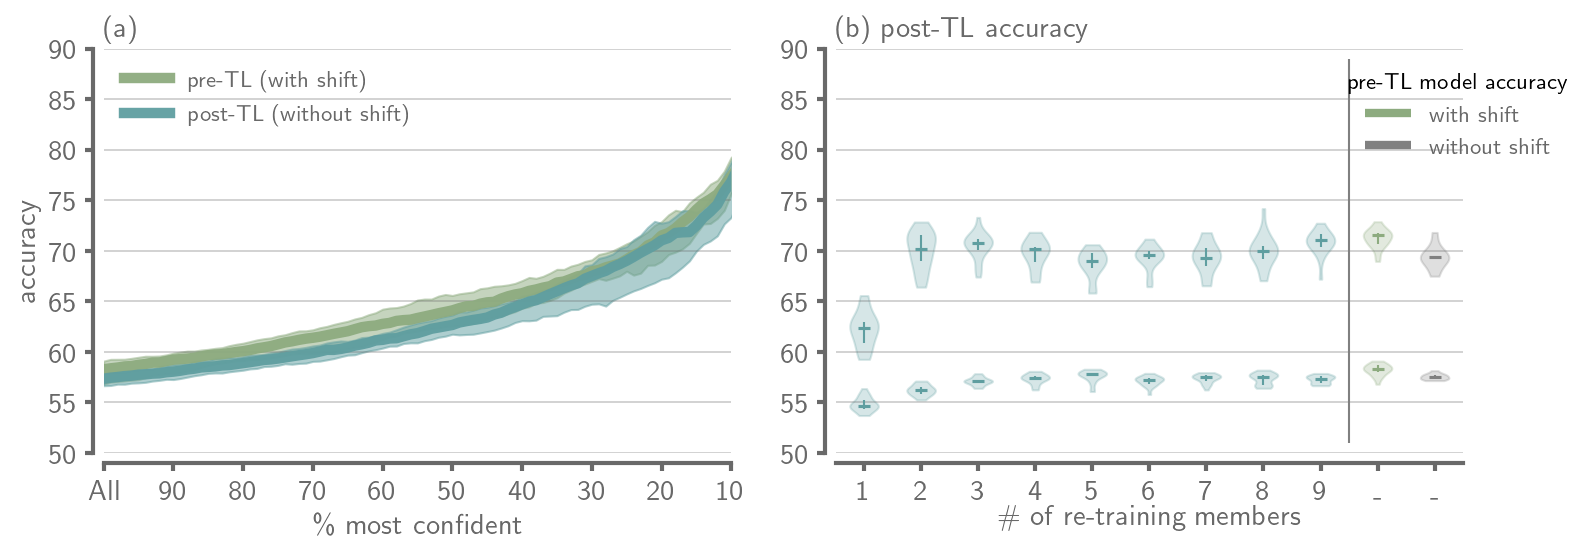

In [8]:
# -- PLOT
cesmcolor = 'k'
allobscolor = 'darkslateblue'
preTLcolor = (141/255,171/255,127/255,1.)
postTLcolor = 'cadetblue'
diffcolor = 'grey'
FS = 14

fig = plt.figure(figsize=(10,3.5))
ax = fig.subplot_mosaic('''
                        AB
                        ''')
plt.tight_layout(w_pad=1,h_pad=3.5)

for loc in ['A','B']:
    adjust_spines(ax[loc], ['left', 'bottom'])
    ax[loc].spines['top'].set_color('none')
    ax[loc].spines['right'].set_color('none')
    ax[loc].spines['left'].set_color('dimgrey')
    ax[loc].spines['bottom'].set_color('dimgrey')
    ax[loc].spines['left'].set_linewidth(2)
    ax[loc].spines['bottom'].set_linewidth(2)
    ax[loc].tick_params('both',length=4,width=2,which='major',color='dimgrey')
    ax[loc].yaxis.grid(zorder=1,color='dimgrey',alpha=0.35)

    if loc == 'A':
        ax[loc].set_ylim(50,90)
        ax[loc].set_xlim(0,90)
        ax[loc].set_ylabel('accuracy',fontsize=FS,color='dimgrey')
        ax[loc].set_yticks(np.arange(50,95,5),labels=np.arange(50,95,5),fontsize=FS,color='dimgrey')
        ax[loc].set_xticks(np.arange(0,100,10),['All',90,80,70,60,50,40,30,20,10],fontsize=FS,color='dimgrey')
        ax[loc].set_xlabel('\% most confident',fontsize=FS,color='dimgrey')
    elif loc == 'B':
        ax[loc].set_ylim(50,90)
        ax[loc].set_xlim(0,110)
        # ax[loc].set_ylabel('accuracy',fontsize=FS+3,color='dimgrey')
        ax[loc].set_yticks(np.arange(50,95,5),labels=np.arange(50,95,5),fontsize=FS,color='dimgrey')
        ax[loc].set_xticks([5,15,25,35,45,55,65,75,85,95,105],[1, 2, 3, 4, 5, 6, 7, 8, 9, '-', '-'],fontsize=FS,color='dimgrey',rotation=0)
        ax[loc].set_xlabel('\# of re-training members',fontsize=FS,color='dimgrey', loc='center', labelpad=0)


# -----------------------------------
# ----- panel (a) -----
# -----------------------------------
ax['A'].set_title('(a)',fontsize=FS,color='dimgrey', loc='left')
ax['A'].fill_between(np.arange(0,100,1),ann1_acc_min,ann1_acc_max,color=preTLcolor, alpha=0.5)
ax['A'].fill_between(np.arange(0,100,1),ann2_acc_min,ann2_acc_max,color=postTLcolor, alpha=0.5)

ax['A'].plot(ann1_acc_avg, '-', color=preTLcolor, alpha=0.95,linewidth=5,label='pre-TL (with shift)')
ax['A'].plot(ann2_acc_avg, '-', color=postTLcolor, alpha=0.95,linewidth=5,label='post-TL (without shift)')

ax['A'].legend(frameon=False, fontsize=FS-3, labelcolor='dimgrey', loc='upper left',ncol=1)

# -----------------------------------
# ----- panel (b) -----
# -----------------------------------
EXP_NAME = 'exp2'
EXP_NAME2 = 'exp2_retrain_increase' 

ax['B'].set_title('(b) post-TL accuracy',fontsize=FS,color='dimgrey', loc='left')
# ax['B'].set_title('(b) Accuracy vs \# of Re-training Members',fontsize=FS,color='dimgrey', loc='left')
positions = [[5],[15],[25],[35],[45],[55],[65],[75],[85],[95],[105]]
# ----- pre-TL (with shift) -----
vp_all = ax['B'].violinplot(ann1_acc[:,0],
                     positions =positions[-2],
                     widths=5,
                     showmeans=False, showmedians=False,showextrema=False)

vp_conf = ax['B'].violinplot(ann1_acc[:,-20],
                     positions =positions[-2],
                     widths=5,
                     showmeans=False, showmedians=False,showextrema=False)

for b in vp_all['bodies']:
    b.set_facecolor(preTLcolor)
    b.set_edgecolor(preTLcolor)
    b.set_alpha(0.25)

for b in vp_conf['bodies']:
    b.set_facecolor(preTLcolor)
    b.set_edgecolor(preTLcolor)
    b.set_alpha(0.25)

quartile1, median, quartile3 = np.percentile(ann1_acc[:,0], [25, 50, 75], axis=0)
ax['B'].scatter(positions[-2], median, marker='_', color=preTLcolor, s=30, zorder=3)
ax['B'].vlines(positions[-2], quartile1, quartile3, color=preTLcolor, linestyle='-', lw=1)

quartile1, median, quartile3 = np.percentile(ann1_acc[:,-20], [25, 50, 75], axis=0)
ax['B'].scatter(positions[-2], median, marker='_', color=preTLcolor, s=30, zorder=3)
ax['B'].vlines(positions[-2], quartile1, quartile3, color=preTLcolor, linestyle='-', lw=1, label='with shift')

ax['B'].vlines(90, 51, 89, color='grey', linestyle='-', lw=1)

# ----- pre-TL -----
vp_all = ax['B'].violinplot(ann1_acc_noshift[:,0],
                     positions =positions[-1],
                     widths=5,
                     showmeans=False, showmedians=False,showextrema=False)

vp_conf = ax['B'].violinplot(ann1_acc_noshift[:,-20],
                     positions =positions[-1],
                     widths=5,
                     showmeans=False, showmedians=False,showextrema=False)

for b in vp_all['bodies']:
    b.set_facecolor('grey')
    b.set_edgecolor('grey')
    b.set_alpha(0.25)

for b in vp_conf['bodies']:
    b.set_facecolor('grey')
    b.set_edgecolor('grey')
    b.set_alpha(0.25)

quartile1, median, quartile3 = np.percentile(ann1_acc_noshift[:,0], [25, 50, 75], axis=0)
ax['B'].scatter(positions[-1], median, marker='_', color='grey', s=30, zorder=3)
ax['B'].vlines(positions[-1], quartile1, quartile3, color='grey', linestyle='-', lw=1)

quartile1, median, quartile3 = np.percentile(ann1_acc_noshift[:,-20], [25, 50, 75], axis=0)
ax['B'].scatter(positions[-1], median, marker='_', color='grey', s=30, zorder=3)
ax['B'].vlines(positions[-1], quartile1, quartile3, color='grey', linestyle='-', lw=1,label='without shift')

# ----- retraining member post-TL loop -----
for i_trainmems in range(9):
    finame = 'confvsacc_ann2_60Eshift_'+EXP_NAME2+'.'+str(i_trainmems)+'_ann1-'+EXP_NAME+'_20seeds.npy'
    ann2_acc_exp3_loop = np.load(ddir+finame)
    ann2_acc_exp3_loop[ann2_acc_exp3_loop==0] = np.nan

    
    vp_all = ax['B'].violinplot(ann2_acc_exp3_loop[:,0],
                            positions =positions[i_trainmems],
                            widths=5,
                            showmeans=False, showmedians=False,showextrema=False)

    vp_conf = ax['B'].violinplot(ann2_acc_exp3_loop[:,-20],
                            positions =positions[i_trainmems],
                            widths=5,
                            showmeans=False, showmedians=False,showextrema=False)
    
    for b in vp_all['bodies']:
        b.set_facecolor(postTLcolor)
        b.set_edgecolor(postTLcolor)
        b.set_alpha(0.25)

    for b in vp_conf['bodies']:
        b.set_facecolor(postTLcolor)
        b.set_edgecolor(postTLcolor)
        b.set_alpha(0.25)
        
    quartile1, median, quartile3 = np.percentile(ann2_acc_exp3_loop[:,0], [25, 50, 75], axis=0)
    ax['B'].scatter(positions[i_trainmems], median, marker='_', color=postTLcolor, s=30, zorder=3)
    ax['B'].vlines(positions[i_trainmems], quartile1, quartile3, color=postTLcolor, linestyle='-', lw=1)

    quartile1, median, quartile3 = np.percentile(ann2_acc_exp3_loop[:,-20], [25, 50, 75], axis=0)
    ax['B'].scatter(positions[i_trainmems], median, marker='_', color=postTLcolor, s=30, zorder=3)
    ax['B'].vlines(positions[i_trainmems], quartile1, quartile3, color=postTLcolor, linestyle='-', lw=1)

legb = ax['B'].legend(frameon=False, fontsize=FS-3,
                      labelcolor='dimgrey',
                      bbox_to_anchor=(1.2, 0.99),
                      # loc='upper right', 
                      ncol=1,
                      title='pre-TL model accuracy',title_fontsize=FS-3)
for line in legb.get_lines():
    line.set_linewidth(4.0)

plt.show()
# plt.savefig('plots/Figure2_addedlabels.png', dpi=300, transparent = True, bbox_inches = 'tight')